In [40]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from prophet import Prophet


In [41]:
data = pd.read_csv("KSS.csv")

In [42]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,49.040001,51.970001,48.790001,51.580002,47.507866,3367400
1,2021-11-02,51.459999,52.400002,50.869999,52.349998,48.217068,2090900
2,2021-11-03,52.430000,57.250000,52.430000,56.529999,52.067066,6545700
3,2021-11-04,56.680000,57.619999,56.189999,56.869999,52.380226,3089800
4,2021-11-05,58.000000,59.090000,57.000000,58.209999,53.614437,3090200


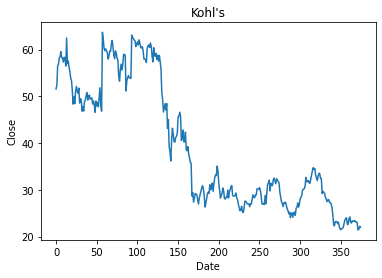

In [43]:
close = data['Close']
ax = close.plot(title ="Kohl's")
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [44]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [45]:
data = data.rename(columns={"Date" : "ds", "Close" : "y"})

In [47]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

12:31:31 - cmdstanpy - INFO - Chain [1] start processing
12:31:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
735,2024-04-23,11.871880,-23.945562,48.963786
736,2024-04-24,11.760896,-24.577111,50.257928
737,2024-04-25,11.773137,-24.364234,50.843626
738,2024-04-26,11.588017,-24.046036,50.627753
739,2024-04-27,10.933924,-25.785016,49.202141


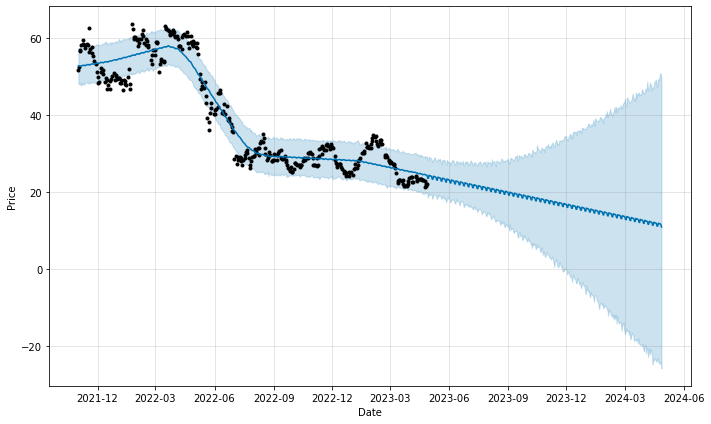

In [48]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")